# Predict the Loan Defaulter for Lending Club data using Industry Segmentation and Sentiment Analysis - Removing variables with > 85% correlation (multicolinearity)

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import numpy as np
import warnings
import tensorflow as tf
from tensorflow import keras
import numpy as np
from sklearn.metrics import classification_report
import pickle

## Read the data and perform the necessary pre processing

In [9]:
data=pd.read_csv("final_data_v2.csv")

In [2]:
corr_cols = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs',
       'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'last_fico_range_high', 'last_fico_range_low',
       'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim', 'acc_open_past_24mths',
       'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths',
       'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op',
       'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc',
       'mths_since_recent_bc', 'mths_since_recent_inq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'percent_bc_gt_75', 'pub_rec_bankruptcies',
       'tax_liens', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit']

In [3]:
# Select the columns and calculate the correlation matrix
corr_matrix = data[corr_cols].corr()

# Display the correlation matrix as a DataFrame
corr_df = pd.DataFrame(corr_matrix)

# To display the entire DataFrame in a readable format, you might want to use additional display options
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

print(corr_df)

                            loan_amnt  funded_amnt  funded_amnt_inv  int_rate  \
loan_amnt                    1.000000     1.000000         0.999994  0.154679   
funded_amnt                  1.000000     1.000000         0.999994  0.154679   
funded_amnt_inv              0.999994     0.999994         1.000000  0.154633   
int_rate                     0.154679     0.154679         0.154633  1.000000   
installment                  0.951386     0.951386         0.951331  0.163658   
annual_inc                   0.246290     0.246290         0.246314 -0.058746   
dti                          0.035645     0.035645         0.035550  0.175801   
delinq_2yrs                 -0.027189    -0.027189        -0.027225  0.050734   
fico_range_low               0.101729     0.101729         0.101865 -0.387911   
fico_range_high              0.101727     0.101727         0.101863 -0.387909   
inq_last_6mths              -0.016783    -0.016783        -0.016824  0.216671   
open_acc                    

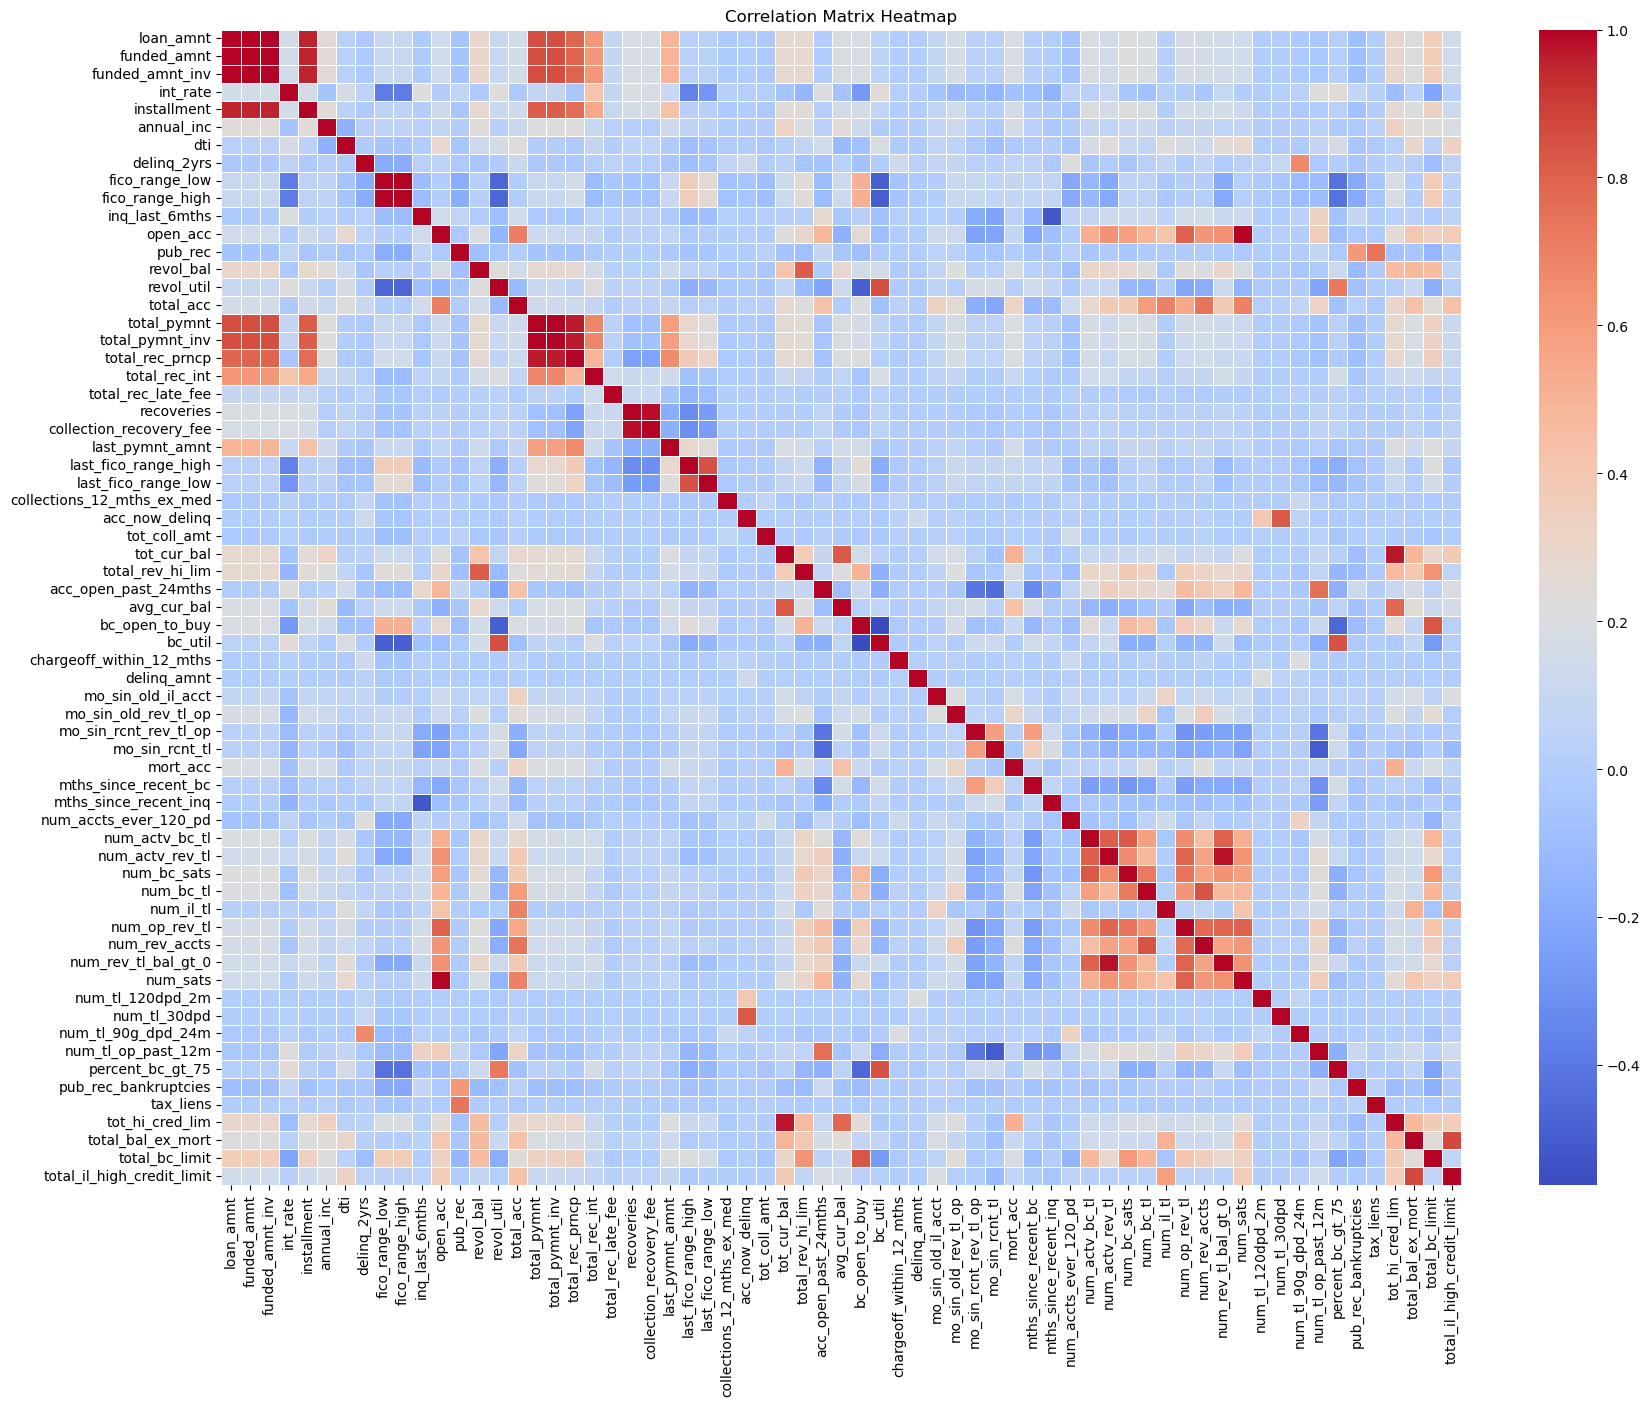

In [4]:
#corr_matrix = df[columns].corr()

# Plotting the heatmap
plt.figure(figsize=(20, 15))  # Adjust the figure size as needed
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

## Split X and Y, remove varibales with correlation > 0.85

In [5]:
# Select the columns and calculate the correlation matrix
corr_matrix = data[corr_cols].corr()

# Display the correlation matrix as a DataFrame
corr_df = pd.DataFrame(corr_matrix)

# Find the highly correlated columns
threshold = 0.85
high_corr_pairs = []

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            colname1 = corr_matrix.columns[i]
            colname2 = corr_matrix.columns[j]
            high_corr_pairs.append((colname1, colname2, corr_matrix.iloc[i, j]))

# Convert to DataFrame for better readability
high_corr_df = pd.DataFrame(high_corr_pairs, columns=['Column1', 'Column2', 'Correlation'])

print(high_corr_df)

                       Column1            Column2  Correlation
0                  funded_amnt          loan_amnt     1.000000
1              funded_amnt_inv          loan_amnt     0.999994
2              funded_amnt_inv        funded_amnt     0.999994
3                  installment          loan_amnt     0.951386
4                  installment        funded_amnt     0.951386
5                  installment    funded_amnt_inv     0.951331
6              fico_range_high     fico_range_low     1.000000
7                  total_pymnt          loan_amnt     0.854934
8                  total_pymnt        funded_amnt     0.854934
9                  total_pymnt    funded_amnt_inv     0.854936
10             total_pymnt_inv          loan_amnt     0.854935
11             total_pymnt_inv        funded_amnt     0.854935
12             total_pymnt_inv    funded_amnt_inv     0.854946
13             total_pymnt_inv        total_pymnt     0.999995
14             total_rec_prncp        total_pymnt     0

In [6]:
# Track columns to drop
columns_to_drop = set()
dropped_columns_reasons = []

for pair in high_corr_pairs:
    colname1, colname2, corr_value = pair
    if colname1 not in columns_to_drop and colname2 not in columns_to_drop:
        # Drop the second column in the pair (you could choose based on other criteria)
        columns_to_drop.add(colname2)
        dropped_columns_reasons.append((colname2, f"Dropped because it is highly correlated with {colname1} (correlation = {corr_value:.2f})"))

# Drop the columns from the DataFrame
data_reduced = data.drop(columns=columns_to_drop)

# Print the columns that were dropped and the reasons
for col, reason in dropped_columns_reasons:
    print(f"Column dropped: {col} | Reason: {reason}")

# Optionally, print the remaining columns
print("Remaining columns after dropping highly correlated ones:")
print(data_reduced.columns)

Column dropped: loan_amnt | Reason: Dropped because it is highly correlated with funded_amnt (correlation = 1.00)
Column dropped: funded_amnt | Reason: Dropped because it is highly correlated with funded_amnt_inv (correlation = 1.00)
Column dropped: funded_amnt_inv | Reason: Dropped because it is highly correlated with installment (correlation = 0.95)
Column dropped: fico_range_low | Reason: Dropped because it is highly correlated with fico_range_high (correlation = 1.00)
Column dropped: total_pymnt | Reason: Dropped because it is highly correlated with total_pymnt_inv (correlation = 1.00)
Column dropped: total_pymnt_inv | Reason: Dropped because it is highly correlated with total_rec_prncp (correlation = 0.97)
Column dropped: recoveries | Reason: Dropped because it is highly correlated with collection_recovery_fee (correlation = 0.99)
Column dropped: revol_util | Reason: Dropped because it is highly correlated with bc_util (correlation = 0.86)
Column dropped: num_actv_rev_tl | Reason:

In [7]:
#data_reduced.to_csv("final_data_v3.csv",index=False)
#import pandas as pd
data_reduced=pd.read_csv("final_data_v3.csv")

In [8]:
X = data_reduced.drop('loan_status', axis=1)  # Features
y = data_reduced[['loan_status']]  # Target variable

## With Sentiment and Industry Columns

### Train, Test Split With Sentiment Columns

In [9]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both the training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Check the shapes of the resulting sets
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (116984, 145), y_train shape: (116984, 1)
X_test shape: (29247, 145), y_test shape: (29247, 1)


### Implementing Smote for Class imbalance¶

In [10]:

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check the distribution of the target after SMOTE
print(f"SMOTE target distribution: {Counter(y_train_smote)}")

SMOTE target distribution: Counter({'loan_status': 1})


### Building Machine Learning Model

#### Basic Model

In [11]:
import warnings
warnings.filterwarnings("ignore")
models = []
models.append(('LR', LogisticRegression(random_state=42)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier(random_state=42)))
models.append(('RF', RandomForestClassifier(random_state=42)))
models.append(('NB',GaussianNB()))
models.append(('XGB', XGBClassifier(random_state=42)))


In [12]:
for name, model in models:
    #model_name, _ = model
    model.fit(X_train_smote, y_train_smote)
    y_pred_train = model.predict(X_train_smote)
    y_pred = model.predict(X_test)
    accuracy_train = accuracy_score(y_train_smote, y_pred_train)
    accuracy_test = accuracy_score(y_test, y_pred)
    print(f"{name} Train Accuracy: {accuracy_train}")
    print(f"{name} Test Accuracy: {accuracy_test}")

LR Train Accuracy: 0.9498890726051195
LR Test Accuracy: 0.9352754128628578
KNN Train Accuracy: 0.9162131898951422
KNN Test Accuracy: 0.7653092624884603
CART Train Accuracy: 1.0
CART Test Accuracy: 0.9908708585495948
RF Train Accuracy: 1.0
RF Test Accuracy: 0.9935377987485896
NB Train Accuracy: 0.967747336696038
NB Test Accuracy: 0.957431531439122
XGB Train Accuracy: 1.0
XGB Test Accuracy: 0.9984613806544261


### Hyper parameter Tuning

In [14]:
models = []
models.append(('LR', LogisticRegression(random_state=42), {'C': [0.01, 0.1, 1, 10, 100], 'solver': ['liblinear', 'lbfgs']}))
models.append(('KNN', KNeighborsClassifier(), {'n_neighbors': np.arange(5, 35, 5), 'weights': ['uniform', 'distance']}))
models.append(('CART', DecisionTreeClassifier(random_state=42), {'max_depth': np.arange(5, 25, 5), 'min_samples_split': np.arange(5, 25, 5)}))
models.append(('RF', RandomForestClassifier(random_state=42), {'n_estimators': np.arange(5, 25, 5), 'max_features': ['auto', 'sqrt', 'log2']}))
models.append(('NB', GaussianNB(), {}))  # GaussianNB doesn't have hyperparameters to tune
models.append(('XGB', XGBClassifier(random_state=42), {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]}))


# Iterate over each model, perform hyperparameter tuning, and evaluate
for name, model, params in models:
    if params:
        grid_search = GridSearchCV(model, param_grid=params, cv=5, scoring='roc_auc')
        grid_search.fit(X_train_smote, y_train_smote)
        best_model = grid_search.best_estimator_
        best_params = grid_search.best_params_
    else:
        # If there are no hyperparameters to tune
        best_model = model
        best_model.fit(X_train_smote, y_train_smote)
        best_params = "N/A"
    
    # Perform cross-validation
    cv_scores = cross_val_score(best_model, X_train_smote, y_train_smote, cv=5, scoring='roc_auc')
    mean_cv_score = np.mean(cv_scores)
    std_cv_score = np.std(cv_scores)
    
    # Fit the best model on the full training data
    best_model.fit(X_train_smote, y_train_smote)
    y_pred = best_model.predict(X_test)
    
    # Calculate classification metrics
    report = classification_report(y_test, y_pred)
    
    # Calculate confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Calculate ROC-AUC score if the model supports predict_proba
    if hasattr(best_model, "predict_proba"):
        y_pred_proba = best_model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_pred_proba)
    else:
        roc_auc = "N/A"
    
    print(f"{name} Classification Report:")
    print(report)
    print(f"Cross-Validation ROC-AUC Score: {mean_cv_score} ± {std_cv_score}")
    print(f"Test ROC-AUC Score: {roc_auc}")
    print(f"Confusion Matrix:\n{conf_matrix}")
    print(f"Model Params{best_params}")
    #print()
    with open(f'{name}_best_model_WithSenti_90.pkl', 'wb') as file:
        pickle.dump(best_model, file)

LR Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5338
           1       1.00      1.00      1.00     23909

    accuracy                           1.00     29247
   macro avg       0.99      0.99      0.99     29247
weighted avg       1.00      1.00      1.00     29247

Cross-Validation ROC-AUC Score: 0.999589254032571 ± 0.00035638578832193017
Test ROC-AUC Score: 0.9990687495131292
Confusion Matrix:
[[ 5278    60]
 [   50 23859]]
Model Params{'C': 1, 'solver': 'liblinear'}
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.42      0.80      0.55      5338
           1       0.94      0.76      0.84     23909

    accuracy                           0.76     29247
   macro avg       0.68      0.78      0.69     29247
weighted avg       0.85      0.76      0.79     29247

Cross-Validation ROC-AUC Score: 0.9688456405121892 ± 0.005624563961694649
Test ROC-AUC

### Deep Learning

In [15]:
model = keras.models.Sequential([
keras.layers.Flatten(input_shape=[145]),
keras.layers.Dense(1000, activation="relu"),
keras.layers.Dense(450, activation="relu"),
keras.layers.Dense(100, activation="relu"),
keras.layers.Dense(1, activation="sigmoid")
])

In [16]:
train_data = X_train_smote
val_data = X_test
train_labels_mc = y_train_smote
val_labels_mc = y_test

# Since it is binary class classification categorical crossentropy and accuracy as metric is utilized to compile the model
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss="binary_crossentropy",
optimizer=opt,
metrics=["accuracy"])

In [17]:
history = model.fit(train_data, train_labels_mc, epochs=100, validation_data=(val_data, val_labels_mc), verbose=1,batch_size=256)# Turn verbose=1 to printing epochs

Epoch 1/100
747/747 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8103 - loss: 2783.1218 - val_accuracy: 0.7873 - val_loss: 2.1395
Epoch 2/100
747/747 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9429 - loss: 0.2844 - val_accuracy: 0.9393 - val_loss: 0.1634
Epoch 3/100
747/747 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9658 - loss: 0.1228 - val_accuracy: 0.9227 - val_loss: 0.2903
Epoch 4/100
747/747 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9777 - loss: 0.0762 - val_accuracy: 0.9218 - val_loss: 0.2304
Epoch 5/100
747/747 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9785 - loss: 0.0813 - val_accuracy: 0.9859 - val_loss: 0.0488
Epoch 6/100
747/747 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9438 - loss: 0.2094 - val_accuracy: 0.5627 - val_loss: 0.5660
Epoch 7/100
747/747 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9147 - loss: 0.2411 - val_accuracy: 0.9579 - val_loss: 0.1246
Epoch 8/100
747/747 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9724 - loss: 0.0964 - val_

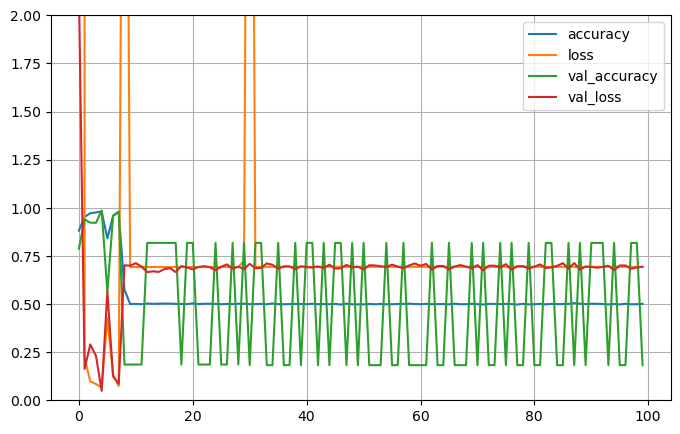

In [18]:
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2)
plt.show()

In [19]:

# Train your model (already done)
#history = model.fit(train_data, train_labels_mc, epochs=100, validation_data=(val_data, val_labels_mc), verbose=1)

# Make predictions on the validation set
predictions = model.predict(val_data)

# Convert predictions to binary class labels
predicted_labels = (predictions > 0.5).astype(int).flatten()

# Generate and print the classification report
report = classification_report(val_labels_mc, predicted_labels, target_names=['Class 0', 'Class 1'])
print(report)

914/914 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
              precision    recall  f1-score   support

     Class 0       0.18      1.00      0.31      5338
     Class 1       0.00      0.00      0.00     23909

    accuracy                           0.18     29247
   macro avg       0.09      0.50      0.15     29247
weighted avg       0.03      0.18      0.06     29247



## Without Sentiment- Dropping Industry and Sentiment Analysis Column

### Removed sentiment columns

In [20]:
data_reduced=data_reduced.drop(['Sentiment Score_2007',
       'Sentiment Score_2008', 'Sentiment Score_2009', 'Sentiment Score_2010',
       'Sentiment Score_2011', 'Sentiment Score_2012', 'Sentiment Score_2013',
       'Sentiment Score_2014', 'Sentiment Score_2015', 'Sentiment Score_2016',
       'Sentiment Score_2017', 'Sentiment Score_2018','sector_Education',
       'sector_Finance and Banking', 'sector_Healthcare', 'sector_IT',
       'sector_Manufacturing'], axis=1)

### Train, Test Split

In [21]:
X = data_reduced.drop('loan_status', axis=1)  # Features
y = data_reduced[['loan_status']]  # Target variable
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both the training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Check the shapes of the resulting sets
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (116984, 128), y_train shape: (116984, 1)
X_test shape: (29247, 128), y_test shape: (29247, 1)


### Implementing Smote for Class Imbalance

In [22]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check the distribution of the target after SMOTE
print(f"SMOTE target distribution: {Counter(y_train_smote)}")

SMOTE target distribution: Counter({'loan_status': 1})


### Building Machine Learning Model

#### Basic Model

In [23]:
import warnings
warnings.filterwarnings("ignore")
models = []
models.append(('LR', LogisticRegression(random_state=42)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier(random_state=42)))
models.append(('RF', RandomForestClassifier(random_state=42)))
models.append(('NB',GaussianNB()))
models.append(('XGB', XGBClassifier(random_state=42)))
for name, model in models:
    #model_name, _ = model
    model.fit(X_train_smote, y_train_smote)
    y_pred_train = model.predict(X_train_smote)
    y_pred = model.predict(X_test)
    accuracy_train = accuracy_score(y_train_smote, y_pred_train)
    accuracy_test = accuracy_score(y_test, y_pred)
    print(f"{name} Train Accuracy: {accuracy_train}")
    print(f"{name} Test Accuracy: {accuracy_test}")

LR Train Accuracy: 0.9443636325582369
LR Test Accuracy: 0.9291893185625876
KNN Train Accuracy: 0.9162131898951422
KNN Test Accuracy: 0.7653092624884603
CART Train Accuracy: 1.0
CART Test Accuracy: 0.9944951618969466
RF Train Accuracy: 1.0
RF Test Accuracy: 0.9935377987485896
NB Train Accuracy: 0.9677525691203248
NB Test Accuracy: 0.957431531439122
XGB Train Accuracy: 1.0
XGB Test Accuracy: 0.9985981468184771


#### Hyper parameter tuning

In [25]:
# List of models and their hyperparameters to tune
models = []
models.append(('LR', LogisticRegression(random_state=42), {'C': [0.01, 0.1, 1, 10, 100], 'solver': ['liblinear', 'lbfgs']}))
models.append(('KNN', KNeighborsClassifier(), {'n_neighbors': np.arange(5, 35, 5), 'weights': ['uniform', 'distance']}))
models.append(('CART', DecisionTreeClassifier(random_state=42), {'max_depth': np.arange(5, 25, 5), 'min_samples_split': np.arange(5, 25, 5)}))
models.append(('RF', RandomForestClassifier(random_state=42), {'n_estimators': np.arange(5, 25, 5), 'max_features': ['auto', 'sqrt', 'log2']}))
models.append(('NB', GaussianNB(), {}))  # GaussianNB doesn't have hyperparameters to tune
models.append(('XGB', XGBClassifier(random_state=42), {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]}))


# Iterate over each model, perform hyperparameter tuning, and evaluate
for name, model, params in models:
    if params:
        grid_search = GridSearchCV(model, param_grid=params, cv=5, scoring='roc_auc')
        grid_search.fit(X_train_smote, y_train_smote)
        best_model = grid_search.best_estimator_
        best_params = grid_search.best_params_
    else:
        # If there are no hyperparameters to tune
        best_model = model
        best_model.fit(X_train_smote, y_train_smote)
        best_params = "N/A"
    
    # Perform cross-validation
    cv_scores = cross_val_score(best_model, X_train_smote, y_train_smote, cv=5, scoring='roc_auc')
    mean_cv_score = np.mean(cv_scores)
    std_cv_score = np.std(cv_scores)
    
    # Fit the best model on the full training data
    best_model.fit(X_train_smote, y_train_smote)
    y_pred = best_model.predict(X_test)
    
    # Calculate classification metrics
    report = classification_report(y_test, y_pred)
    
    # Calculate confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Calculate ROC-AUC score if the model supports predict_proba
    if hasattr(best_model, "predict_proba"):
        y_pred_proba = best_model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_pred_proba)
    else:
        roc_auc = "N/A"
    
    print(f"{name} Classification Report:")
    print(report)
    print(f"Cross-Validation ROC-AUC Score: {mean_cv_score} ± {std_cv_score}")
    print(f"Test ROC-AUC Score: {roc_auc}")
    print(f"Confusion Matrix:\n{conf_matrix}")
    print(f"Model Params{best_params}")
    #print()
    with open(f'{name}_best_model_WithoutSenti_90.pkl', 'wb') as file:
        pickle.dump(best_model, file)

LR Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5338
           1       1.00      1.00      1.00     23909

    accuracy                           1.00     29247
   macro avg       0.99      0.99      0.99     29247
weighted avg       1.00      1.00      1.00     29247

Cross-Validation ROC-AUC Score: 0.9996132032443192 ± 0.00035293347590558446
Test ROC-AUC Score: 0.9989806093326793
Confusion Matrix:
[[ 5268    70]
 [   63 23846]]
Model Params{'C': 1, 'solver': 'liblinear'}
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.42      0.80      0.55      5338
           1       0.94      0.76      0.84     23909

    accuracy                           0.76     29247
   macro avg       0.68      0.78      0.69     29247
weighted avg       0.85      0.76      0.79     29247

Cross-Validation ROC-AUC Score: 0.9688456405121892 ± 0.005624563961694649
Test ROC-AU

### Deep Learning

In [26]:
model = keras.models.Sequential([
keras.layers.Flatten(input_shape=[128]),
keras.layers.Dense(800, activation="relu"),
keras.layers.Dense(450, activation="relu"),
keras.layers.Dense(100, activation="relu"),
keras.layers.Dense(1, activation="sigmoid")
])

In [27]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[128]),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dropout(0.5),  # Adding dropout to prevent overfitting
    keras.layers.Dense(512, activation="relu"),
    keras.layers.Dropout(0.5),  # Adding dropout to prevent overfitting
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dropout(0.5),  # Adding dropout to prevent overfitting
    keras.layers.Dense(1, activation="sigmoid")
])

opt = tf.keras.optimizers.Adam(learning_rate=0.0001)  # Lower learning rate for stable training
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])


In [28]:
train_data = X_train_smote
val_data = X_test
train_labels_mc = y_train_smote
val_labels_mc = y_test

In [29]:
# Since it is binary class classification categorical crossentropy and accuracy as metric is utilized to compile the model
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss="binary_crossentropy",
optimizer=opt,
metrics=["accuracy"])

In [30]:
history = model.fit(train_data, train_labels_mc, epochs=100, validation_data=(val_data, val_labels_mc), verbose=1)# Turn verbose=1 to printing epochs

Epoch 1/100
5973/5973 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step - accuracy: 0.5267 - loss: 473.8574 - val_accuracy: 0.8175 - val_loss: 0.6853
Epoch 2/100
5973/5973 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.4988 - loss: 0.8933 - val_accuracy: 0.8175 - val_loss: 0.6909
Epoch 3/100
5973/5973 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.4995 - loss: 1.0951 - val_accuracy: 0.8175 - val_loss: 0.6914
Epoch 4/100
5973/5973 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.4971 - loss: 0.8458 - val_accuracy: 0.1825 - val_loss: 0.6967
Epoch 5/100
5973/5973 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.5013 - loss: 0.7183 - val_accuracy: 0.1825 - val_loss: 0.6965
Epoch 6/100
5973/5973 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.5005 - loss: 0.7205 - val_accuracy: 0.1825 - val_loss: 0.6981
Epoch 7/100
5973/5973 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.5010 - loss: 0.7171 - val_accuracy: 0.8175 - val_loss: 0.6912
Epoch 8/100
5973/5973 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step - accuracy: 0.4985

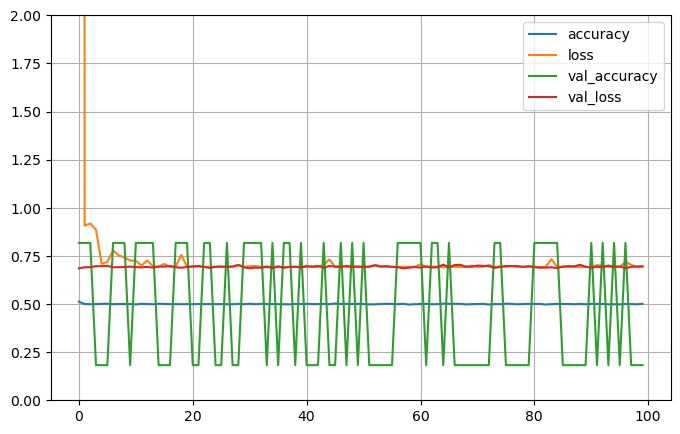

In [31]:
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2)
plt.show()

In [32]:
import numpy as np
from sklearn.metrics import classification_report

# Train your model (already done)
#history = model.fit(train_data, train_labels_mc, epochs=100, validation_data=(val_data, val_labels_mc), verbose=1)

# Make predictions on the validation set
predictions = model.predict(val_data)

# Convert predictions to binary class labels
predicted_labels = (predictions > 0.5).astype(int).flatten()

# Generate and print the classification report
report = classification_report(val_labels_mc, predicted_labels, target_names=['Class 0', 'Class 1'])
print(report)

914/914 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
              precision    recall  f1-score   support

     Class 0       0.18      1.00      0.31      5338
     Class 1       0.00      0.00      0.00     23909

    accuracy                           0.18     29247
   macro avg       0.09      0.50      0.15     29247
weighted avg       0.03      0.18      0.06     29247



## Statistical Test

In [33]:
import pandas as pd
import numpy as np
data_reduced=pd.read_csv("final_data_v3.csv")
X=data_reduced.drop(['loan_status'],axis=1)
y=data_reduced[['loan_status']]
X_mod=X

### With Sentiment - Final XGB model with the best parameters and feature importance

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_mod, y, test_size=0.2, random_state=42)

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both the training and testing data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Check the shapes of the resulting sets
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (116984, 145), y_train shape: (116984, 1)
X_test shape: (29247, 145), y_test shape: (29247, 1)


In [35]:
from imblearn.over_sampling import SMOTE
from collections import Counter
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check the distribution of the target after SMOTE
print(f"SMOTE target distribution: {Counter(y_train_smote)}")

SMOTE target distribution: Counter({'loan_status': 1})


Test Accuracy: 0.9984271891134133
Test Precision: 0.9981213209201353
Test Recall: 0.9999581747459115
Test F1 Score: 0.9990389035142702
Test ROC AUC: 0.9999505117450689

Feature Importance:
                     Feature  Importance
13   collection_recovery_fee    0.610854
15      last_fico_range_high    0.185322
61      Sentiment Score_2015    0.066489
14           last_pymnt_amnt    0.054945
65            term_36 months    0.015348
1                installment    0.010907
138   debt_settlement_flag_N    0.008085
10           total_rec_prncp    0.007735
62      Sentiment Score_2016    0.005501
63      Sentiment Score_2017    0.004430
60      Sentiment Score_2014    0.002293
12        total_rec_late_fee    0.002171
11             total_rec_int    0.001410
143                sector_IT    0.000946
59      Sentiment Score_2013    0.000937
75              sub_grade_A2    0.000904
67                   grade_A    0.000783
64      Sentiment Score_2018    0.000698
0                   int_rate    

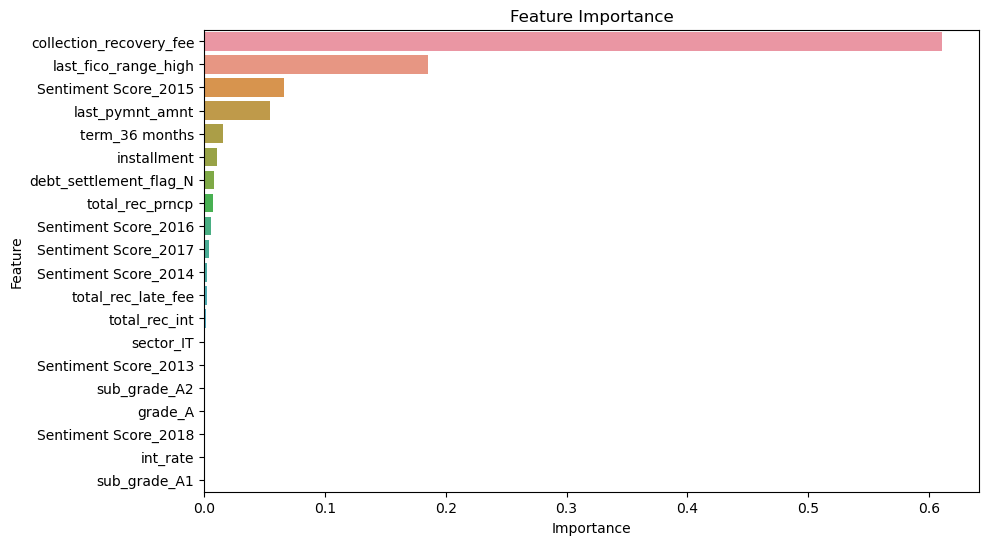

In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

model_params = {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200}
model = XGBClassifier(**model_params)

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on both the training and test data
y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)

# Make predictions on both the training and test data
y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)

# Calculate probabilities for ROC AUC
y_pred_proba_train = model.predict_proba(X_train)[:, 1]
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Calculate metrics for the training data
accuracy_train = accuracy_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train)
recall_train = recall_score(y_train, y_pred_train)
f1_train = f1_score(y_train, y_pred_train)
roc_auc_train = roc_auc_score(y_train, y_pred_proba_train)

# Calculate metrics for the test data
accuracy_test = accuracy_score(y_test, y_pred)
precision_test = precision_score(y_test, y_pred)
recall_test = recall_score(y_test, y_pred)
f1_test = f1_score(y_test, y_pred)
roc_auc_test = roc_auc_score(y_test, y_pred_proba)

'''
# Print the metrics
print(f"Train Accuracy: {accuracy_train}")
print(f"Train Precision: {precision_train}")
print(f"Train Recall: {recall_train}")
print(f"Train F1 Score: {f1_train}")
print(f"Train ROC AUC: {roc_auc_train}")
'''

print(f"Test Accuracy: {accuracy_test}")
print(f"Test Precision: {precision_test}")
print(f"Test Recall: {recall_test}")
print(f"Test F1 Score: {f1_test}")
print(f"Test ROC AUC: {roc_auc_test}")

# Get feature importance
feature_importances = model.feature_importances_
features = X_mod.columns 
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)[:20]

# Print feature importance
print("\nFeature Importance:")
print(importance_df)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.show()


### Without Sentiment - Final XGB model with the best parameters and feature importance

In [37]:
col2=['Sentiment Score_2007',
 'Sentiment Score_2008',
 'Sentiment Score_2009',
 'Sentiment Score_2010',
 'Sentiment Score_2011',
 'Sentiment Score_2012',
 'Sentiment Score_2013',
 'Sentiment Score_2014',
 'Sentiment Score_2015',
 'Sentiment Score_2016',
 'Sentiment Score_2017',
 'Sentiment Score_2018','sector_Education',
  'sector_Finance and Banking',
  'sector_Healthcare',
  'sector_IT',
  'sector_Manufacturing']
X_mod_no_senti=X_mod.drop(col2,axis=1)

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Split the data into train and test sets
X_train_no_senti, X_test_no_senti, y_train_no_senti, y_test_no_senti = train_test_split(X_mod_no_senti, y, test_size=0.2, random_state=42)

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both the training and testing data
X_train_no_senti = scaler.fit_transform(X_train_no_senti)
X_test_no_senti = scaler.transform(X_test_no_senti)

# Check the shapes of the resulting sets
print(f"X_train shape: {X_train_no_senti.shape}, y_train shape: {y_train_no_senti.shape}")
print(f"X_test shape: {X_test_no_senti.shape}, y_test shape: {y_test_no_senti.shape}")

X_train shape: (116984, 128), y_train shape: (116984, 1)
X_test shape: (29247, 128), y_test shape: (29247, 1)


In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_no_senti, y_train_no_senti = smote.fit_resample(X_train_no_senti, y_train_no_senti)

# Check the distribution of the target after SMOTE
#print(f"SMOTE target distribution: {Counter(y_train_no_senti)}")

Test Accuracy: 0.9985297637364516
Test Precision: 0.9983295748768062
Test Recall: 0.9998745242377347
Test F1 Score: 0.9991014523038345
Test ROC AUC: 0.9999521219154912

Feature Importance:
                                 Feature  Importance
16                   last_fico_range_low    0.501255
13               collection_recovery_fee    0.372353
14                       last_pymnt_amnt    0.057807
53                        term_36 months    0.027054
1                            installment    0.008508
10                       total_rec_prncp    0.005531
126               debt_settlement_flag_N    0.003766
103  verification_status_Source Verified    0.002178
12                    total_rec_late_fee    0.001358
86                          sub_grade_E5    0.001148
121          application_type_Individual    0.000921
82                          sub_grade_E1    0.000753
106                          purpose_car    0.000725
15                  last_fico_range_high    0.000591
114             

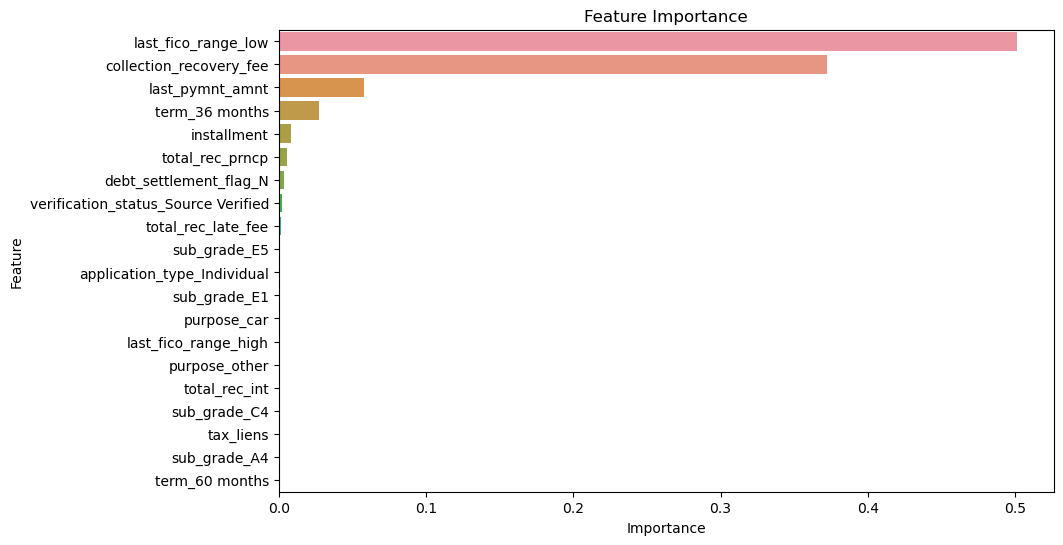

In [40]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Initialize the model with specified parameters
model_params = {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200}
model1 = XGBClassifier(**model_params)

# Fit the model on the training data
model1.fit(X_train_no_senti, y_train_no_senti)

# Make predictions on both the training and test data
y_pred_train = model1.predict(X_train_no_senti)
y_pred = model1.predict(X_test_no_senti)

# Calculate probabilities for ROC AUC
y_pred_proba_train = model1.predict_proba(X_train_no_senti)[:, 1]
y_pred_proba = model1.predict_proba(X_test_no_senti)[:, 1]

# Calculate metrics for the training data
accuracy_train = accuracy_score(y_train_no_senti, y_pred_train)
precision_train = precision_score(y_train_no_senti, y_pred_train)
recall_train = recall_score(y_train_no_senti, y_pred_train)
f1_train = f1_score(y_train_no_senti, y_pred_train)
roc_auc_train = roc_auc_score(y_train_no_senti, y_pred_proba_train)

# Calculate metrics for the test data
accuracy_test = accuracy_score(y_test_no_senti, y_pred)
precision_test = precision_score(y_test_no_senti, y_pred)
recall_test = recall_score(y_test_no_senti, y_pred)
f1_test = f1_score(y_test_no_senti, y_pred)
roc_auc_test = roc_auc_score(y_test_no_senti, y_pred_proba)

# Print the metrics
'''
print(f"Train Accuracy: {accuracy_train}")
print(f"Train Precision: {precision_train}")
print(f"Train Recall: {recall_train}")
print(f"Train F1 Score: {f1_train}")
print(f"Train ROC AUC: {roc_auc_train}")
'''
print(f"Test Accuracy: {accuracy_test}")
print(f"Test Precision: {precision_test}")
print(f"Test Recall: {recall_test}")
print(f"Test F1 Score: {f1_test}")
print(f"Test ROC AUC: {roc_auc_test}")

# Get feature importance
feature_importances = model1.feature_importances_
features = X_mod_no_senti.columns 
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)[:20]

# Print feature importance
print("\nFeature Importance:")
print(importance_df)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.show()


### Perform t-test (Statistical test for the best models of with and without sentiment, for accuracy and ROC AUC scores)

In [41]:
from scipy.stats import ttest_rel
# Initialize models
model_params = {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200}
model1 = XGBClassifier(**model_params)
model2 = XGBClassifier(**model_params)

# Store accuracies
accuracies_model1 = []
accuracies_model2 = []

# Number of runs
n_runs = 31

for i in range(n_runs):
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X_mod, y, test_size=0.2, random_state=i)
    
    # Model 1
    model1.fit(X_train, y_train)
    y_pred1 = model1.predict(X_test)
    acc1 = accuracy_score(y_test, y_pred1)
    accuracies_model1.append(acc1)
    
    X_train_no_senti, X_test_no_senti, y_train_no_senti, y_test_no_senti = train_test_split(X_mod_no_senti, y, test_size=0.2, random_state= i)
    # Model 2
    model2.fit(X_train_no_senti, y_train_no_senti)
    y_pred2 = model2.predict(X_test_no_senti)
    acc2 = accuracy_score(y_test_no_senti, y_pred2)
    accuracies_model2.append(acc2)

# Perform paired t-test
t_stat, p_value = ttest_rel(accuracies_model1, accuracies_model2)

print(f"Model 1 Accuracies: {accuracies_model1}")
print(f"Model 2 Accuracies: {accuracies_model2}")
print(f"T-statistic: {t_stat}, P-value: {p_value}")

if p_value < 0.05:
    print("The difference in accuracies is statistically significant.")
else:
    print("The difference in accuracies is not statistically significant.")


Model 1 Accuracies: [0.9987349129825281, 0.9986665299005026, 0.9985639552774643, 0.9988716791465792, 0.9986323383594898, 0.9985981468184771, 0.9987349129825281, 0.9986323383594898, 0.9988716791465792, 0.9986323383594898, 0.9987349129825281, 0.9989400622286047, 0.9987349129825281, 0.9988374876055663, 0.9988032960645536, 0.9986323383594898, 0.9985639552774643, 0.9987349129825281, 0.9987691045235408, 0.9984955721954388, 0.9987007214415153, 0.9985639552774643, 0.9985639552774643, 0.9986323383594898, 0.9983588060313878, 0.9984955721954388, 0.998187848326324, 0.9986665299005026, 0.9985297637364516, 0.9986323383594898, 0.9988032960645536]
Model 2 Accuracies: [0.9987007214415153, 0.9985981468184771, 0.9985981468184771, 0.9989400622286047, 0.9989400622286047, 0.9985297637364516, 0.9985639552774643, 0.9985981468184771, 0.9987007214415153, 0.9985639552774643, 0.9986323383594898, 0.9987691045235408, 0.9987349129825281, 0.9988716791465792, 0.9987691045235408, 0.9986323383594898, 0.9985639552774643,

In [42]:
from scipy.stats import ttest_rel
# Initialize models
model_params = {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200}
model1 = XGBClassifier(**model_params)
model2 = XGBClassifier(**model_params)

# Store accuracies
roc_model1 = []
roc_model2 = []

# Number of runs
n_runs = 31

for i in range(n_runs):
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X_mod, y, test_size=0.2, random_state=i)
    
    # Model 1
    model1.fit(X_train, y_train)
    y_pred1 = model1.predict(X_test)
    # Calculate probabilities for ROC AUC
    y_pred_proba_train1 = model1.predict_proba(X_train)[:, 1]
    y_pred_proba1 = model1.predict_proba(X_test)[:, 1]
    roc1=roc_auc_score(y_test, y_pred_proba1)
    roc_model1.append(roc1)
    
    X_train_no_senti, X_test_no_senti, y_train_no_senti, y_test_no_senti = train_test_split(X_mod_no_senti, y, test_size=0.2, random_state= i)
    # Model 2
    model2.fit(X_train_no_senti, y_train_no_senti)
    y_pred2 = model2.predict(X_test_no_senti)
    #Calculate probabilities for ROC AUC
    y_pred_proba_train2 = model2.predict_proba(X_train_no_senti)[:, 1]
    y_pred_proba2 = model2.predict_proba(X_test_no_senti)[:, 1]
    roc2=roc_auc_score(y_test_no_senti, y_pred_proba2)
    roc_model2.append(roc2)
    

# Perform paired t-test
t_stat, p_value = ttest_rel(roc_model1, roc_model2)

print(f"Model 1 Accuracies: {roc_model1}")
print(f"Model 2 Accuracies: {roc_model2}")
print(f"T-statistic: {t_stat}, P-value: {p_value}")

if p_value < 0.05:
    print("The difference in roc value is statistically significant.")
else:
    print("The difference in roc value is not statistically significant.")


Model 1 Accuracies: [0.9999157910946804, 0.9999193575422086, 0.9997731665761325, 0.9999633500138632, 0.9998895060605907, 0.9998327666997402, 0.9998301183059581, 0.9997060910848445, 0.9999116914800197, 0.9999248802499113, 0.999813587502721, 0.9998500669263727, 0.9999055641112183, 0.9999253914260156, 0.9998710393102731, 0.9999524848822858, 0.9999596416746023, 0.9999460299256033, 0.9999649993339634, 0.9999065142806136, 0.9998967651794741, 0.9998744532401465, 0.9998378325741564, 0.9999628479301972, 0.9997862592412429, 0.9999318756223767, 0.9999120944651251, 0.999860439922662, 0.9999178707952646, 0.9999168682946534, 0.9997538530307815]
Model 2 Accuracies: [0.9999339780381659, 0.9999080278058731, 0.9997516466626273, 0.9999697005886925, 0.9999216785672038, 0.9998105419397805, 0.9998731522976945, 0.9997221338510524, 0.9999181148374297, 0.9999460531798382, 0.9998218073850246, 0.99986731953167, 0.9998976137292881, 0.9999299711890565, 0.9998636553053837, 0.999949092355803, 0.9999391766768229, 0.9

## Conclusion

From the result, we can conclude that there is no difference/ increase in accuracy when adding sentiment columns (when we have almost all variables)